### **INFOSYS SPRINGBOARD TASK 1**

IMPORTING REQUIRED LIBRARIES & DATASET

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer 

In [8]:
data = pd.read_csv(r"C:\Users\Kruthika Kamalapur\Downloads\train.csv")

### **1. IMPUTATION OF MISSING VALUES**

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# Calculating the mean of 'Item_Visibility' for entries where it is greater than 0
non_zero_mean = data.loc[data['Item_Visibility'] > 0, 'Item_Visibility'].mean()

In [73]:
# Filling missing values in 'Item_Weight' with the median weight
# data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace=True)

In [74]:
# Filling missing values in 'Outlet_Size' with the most frequent value (mode)
# data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

In [75]:
# Fixing  inconsistencies in the 'Item_Fat_Content' column by standardizing the labels
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [76]:
# Checking for duplicates and removing them if any
data.drop_duplicates(inplace=True)

In [77]:
# rechecking again if we find any missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Age                      0
Item_Weight_zscore              0
Item_Visibility_zscore          0
Item_MRP_zscore                 0
Item_Outlet_Sales_zscore        0
Item_Outlet_Sales_Log        1451
dtype: int64

### **2. CATEGORICAL VARIABLE ENCODING**

In [78]:
# Nominal columns (categorical without order)
nominal_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
                   'Outlet_Identifier', 'Outlet_Location_Type', 
                   'Outlet_Type'] 

# Ordinal columns (categorical with order)
ordinal_columns = ['Outlet_Size']  

# Continuous (Numerical columns)
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                    'Item_Outlet_Sales', 'Outlet_Establishment_Year']  

# printing them seperatly
print("Nominal Columns: ", nominal_columns)
print("Ordinal Columns: ", ordinal_columns)
print("Numerical Columns: ", numerical_columns)

Nominal Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns:  ['Outlet_Size']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']


In [79]:
# mapping the ordinal encoding
Outlet_Size_mapping = ['Small', 'Medium', 'High'] 

In [80]:
# Creating encoders and scaler
ohe = OneHotEncoder(sparse_output=False)  # For nominal columns
ode = OrdinalEncoder(categories=[Outlet_Size_mapping])  # For ordinal column
scaler = StandardScaler()  # For numeric columns

In [81]:
# Creating the column transformer
ct = make_column_transformer(
    (ohe, ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
            'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']),  # Nominal columns
    (ode, ['Outlet_Size']),  # Ordinal column
    (scaler, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
              'Outlet_Establishment_Year', 'Item_Outlet_Sales']),  # Numeric columns
    remainder='passthrough'
)

ct.set_output(transform= 'pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Item_Identifier', 'Item_Fat_Content',
                                  'Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Small', 'Medium',
                                                             'High']]),
                                 ['Outlet_Size']),
                                ('standardscaler', StandardScaler(),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year',
                                  'Item_Outlet_Sales'])])

In [82]:
df_encoded = ct.fit_transform(data)
df_encoded

,onehotencoder__Item_Identifier_DRA12,onehotencoder__Item_Identifier_DRA24,onehotencoder__Item_Identifier_DRA59,onehotencoder__Item_Identifier_DRB01,onehotencoder__Item_Identifier_DRB13,onehotencoder__Item_Identifier_DRB24,onehotencoder__Item_Identifier_DRB25,onehotencoder__Item_Identifier_DRB48,onehotencoder__Item_Identifier_DRC01,onehotencoder__Item_Identifier_DRC12,...,standardscaler__Item_Visibility,standardscaler__Item_MRP,standardscaler__Outlet_Establishment_Year,standardscaler__Item_Outlet_Sales,remainder__Outlet_Age,remainder__Item_Weight_zscore,remainder__Item_Visibility_zscore,remainder__Item_MRP_zscore,remainder__Item_Outlet_Sales_zscore,remainder__Item_Outlet_Sales_Log
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.970462,1.839240,0.119146,1.245580,25,0.826516,0.971050,1.800655,1.122168,0.808964
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.908291,-1.465425,1.325958,-1.090734,15,1.621178,0.908729,1.475936,1.074461,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.956746,0.065222,0.119146,0.083094,25,1.101364,0.957301,0.041707,0.029185,0.079822
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.279249,0.728926,-0.001535,-0.885645,26,1.501046,1.280587,0.699773,0.881634,-2.168444
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.279249,-1.373729,-1.329028,-0.699458,37,0.913505,1.280587,1.385019,0.706579,-1.202167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.186606,1.260630,-1.329028,0.566518,37,1.399002,0.185291,1.226960,0.483706,0.448855
8519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.375199,-0.483441,0.481190,-1.015597,22,1.042814,0.374342,0.502294,1.003817,NaN
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.602184,-0.861140,0.722552,-0.558636,20,0.520876,0.601878,0.876785,0.574177,-0.817886
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.515131,-0.565816,1.325958,-0.095532,15,1.317890,1.520577,0.583970,0.138761,-0.100408


### **3. FEATURE DERIVATION**

In [83]:
# Feature Derivation: Creating a new feature for the store's age
data['Outlet_Age'] = 2024 - data['Outlet_Establishment_Year']

data[['Outlet_Establishment_Year', 'Outlet_Age']].head()

,Outlet_Establishment_Year,Outlet_Age
0,1999,25
1,2009,15
2,1999,25
3,1998,26
4,1987,37


### **4. OUTLIER TREATMENT**

In [59]:
from scipy import stats

In [60]:
data.shape

(8326, 18)

Using Z-Score Method

Item_Weight: 0 outliers detected.
Item_Visibility: 144 outliers detected.
Item_MRP: 0 outliers detected.
Item_Outlet_Sales: 149 outliers detected.


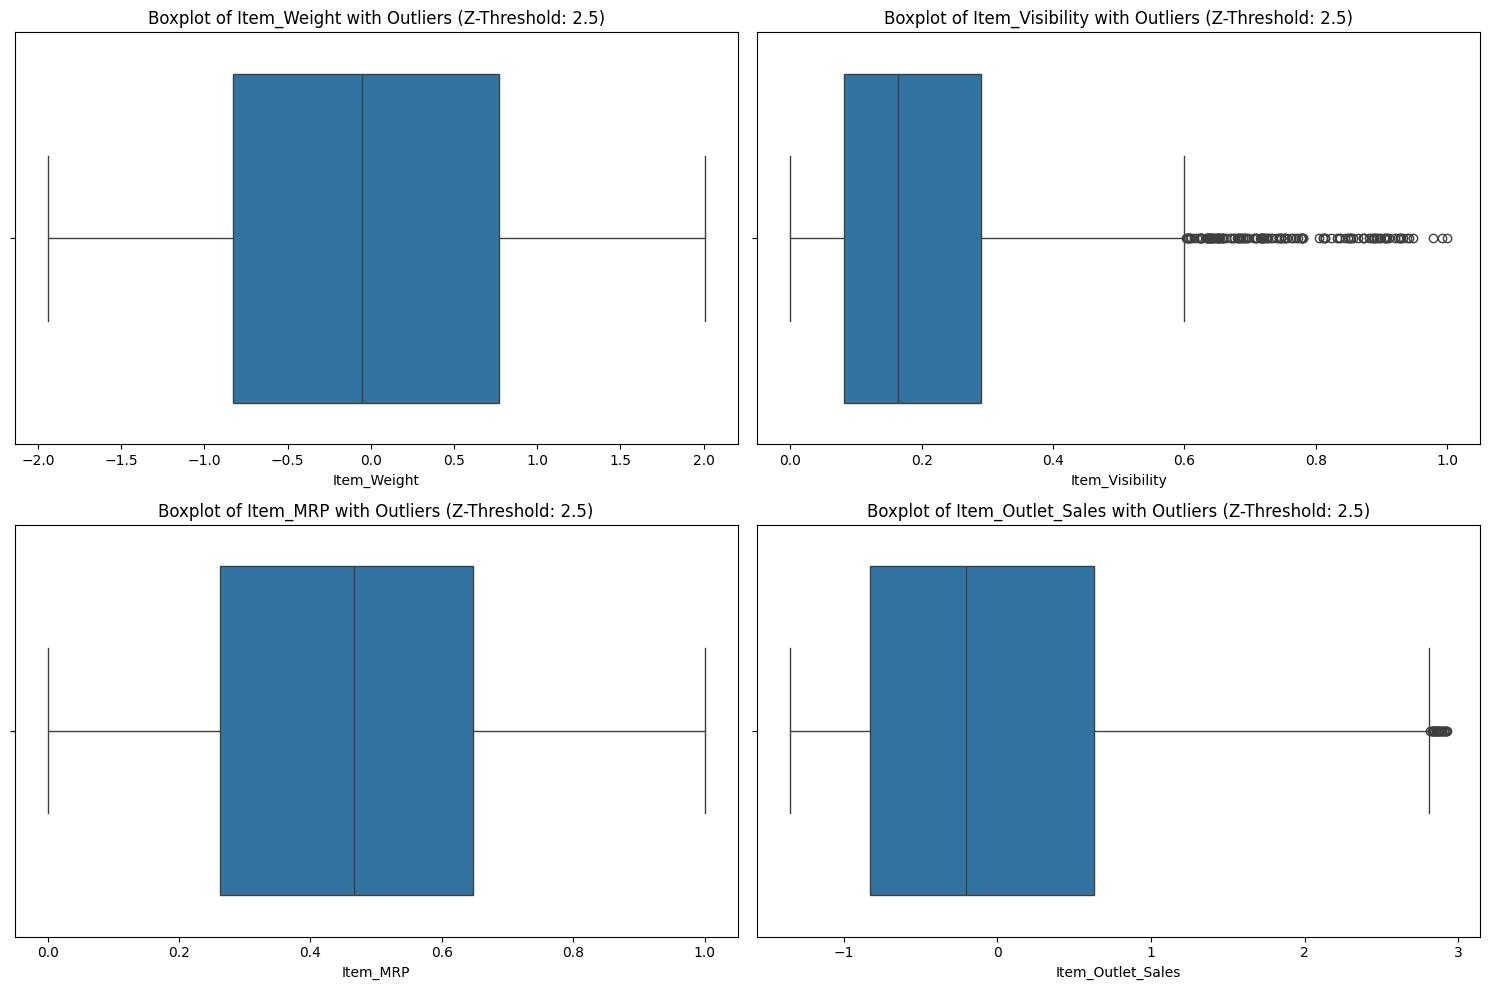

In [61]:
# continuous numerical features
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Z-score threshold
z_threshold = 2.5  # as 3 results with 0 outliers & 2 with many so fixed T as 2.5

# outliers based on Z-score for each column
outliers_dict = {}
for col in continuous_columns:
    
    # Z-Score calculation
    data[col + '_zscore'] = np.abs((data[col] - data[col].mean()) / data[col].std())
    
    # outliers where Z-score is greater than threshold
    outliers_dict[col] = data[data[col + '_zscore'] > z_threshold]
    
    # Printing outlier count
    print(f"{col}: {outliers_dict[col].shape[0]} outliers detected.")

plt.figure(figsize=(15, 10))

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)  # Creating a 2x2 grid of plots
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col} with Outliers (Z-Threshold: {z_threshold})')

plt.tight_layout()
plt.show()


In [84]:
# Removing rows where Z-score for 'Item_Outlet_Sales' is greater than the threshold
z_threshold = 2.5
outliers_removed = data[data['Item_Outlet_Sales_zscore'] <= z_threshold]

print(f"Original dataset size: {data.shape}")
print(f"Dataset size after removing outliers: {outliers_removed.shape}")

Original dataset size: (8177, 18)
Dataset size after removing outliers: (8177, 18)


Using IQR Method

In [63]:
'''
outliers_dict_iqr = {}
for col in continuous_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Defining bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outliers where values are below lower_bound or above upper_bound
    outliers_dict_iqr[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    # Printing outlier count
    print(f"{col}: {outliers_dict_iqr[col].shape[0]} outliers detected using IQR.")

# Removing outliers using IQR for 'Item_Outlet_Sales'
outliers_removed_iqr = data[~((data['Item_Outlet_Sales'] < (data['Item_Outlet_Sales'].quantile(0.25) - 1.5 * (data['Item_Outlet_Sales'].quantile(0.75) - data['Item_Outlet_Sales'].quantile(0.25)))) | 
                             (data['Item_Outlet_Sales'] > (data['Item_Outlet_Sales'].quantile(0.75) + 1.5 * (data['Item_Outlet_Sales'].quantile(0.75) - data['Item_Outlet_Sales'].quantile(0.25)))))]
print(f"Dataset size after removing outliers (IQR): {outliers_removed_iqr.shape}")

'''

'\noutliers_dict_iqr = {}\nfor col in continuous_columns:\n    Q1 = data[col].quantile(0.25)\n    Q3 = data[col].quantile(0.75)\n    IQR = Q3 - Q1\n    \n    # Defining bounds for outliers\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    \n    # Outliers where values are below lower_bound or above upper_bound\n    outliers_dict_iqr[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]\n    \n    # Printing outlier count\n    print(f"{col}: {outliers_dict_iqr[col].shape[0]} outliers detected using IQR.")\n\n# Removing outliers using IQR for \'Item_Outlet_Sales\'\noutliers_removed_iqr = data[~((data[\'Item_Outlet_Sales\'] < (data[\'Item_Outlet_Sales\'].quantile(0.25) - 1.5 * (data[\'Item_Outlet_Sales\'].quantile(0.75) - data[\'Item_Outlet_Sales\'].quantile(0.25)))) | \n                             (data[\'Item_Outlet_Sales\'] > (data[\'Item_Outlet_Sales\'].quantile(0.75) + 1.5 * (data[\'Item_Outlet_Sales\'].quantile(0.75) - data[\'Item_Outlet_Sales\']

In [85]:
# Assuming 'outliers_removed' is cleaned dataset

scaled_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# standardizing the columns
scaler = StandardScaler()
outliers_removed[scaled_columns] = scaler.fit_transform(outliers_removed[scaled_columns])

outliers_removed.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Weight_zscore,Item_Visibility_zscore,Item_MRP_zscore,Item_Outlet_Sales_zscore,Item_Outlet_Sales_Log
0,FDA15,-0.824786,Low Fat,-0.970462,Dairy,1.839240,OUT049,1999,Medium,Tier 1,Supermarket Type1,1.245580,25,0.826516,0.971050,1.800655,1.122168,0.808964
1,DRC01,-1.618151,Regular,-0.908291,Soft Drinks,-1.465425,OUT018,2009,Medium,Tier 3,Supermarket Type2,-1.090734,15,1.621178,0.908729,1.475936,1.074461,NaN
2,FDN15,1.099945,Low Fat,-0.956746,Meat,0.065222,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.083094,25,1.101364,0.957301,0.041707,0.029185,0.079822
3,FDX07,1.498974,Regular,-1.279249,Fruits and Vegetables,0.728926,OUT010,1998,Medium,Tier 3,Grocery Store,-0.885645,26,1.501046,1.280587,0.699773,0.881634,-2.168444
4,NCD19,-0.911634,Low Fat,-1.279249,Household,-1.373729,OUT013,1987,High,Tier 3,Supermarket Type1,-0.699458,37,0.913505,1.280587,1.385019,0.706579,-1.202167


In [86]:
# Replacing 'data' with the updated dataset (outliers_removed)
data = outliers_removed
data.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Weight_zscore,Item_Visibility_zscore,Item_MRP_zscore,Item_Outlet_Sales_zscore,Item_Outlet_Sales_Log
0,FDA15,-0.824786,Low Fat,-0.970462,Dairy,1.839240,OUT049,1999,Medium,Tier 1,Supermarket Type1,1.245580,25,0.826516,0.971050,1.800655,1.122168,0.808964
1,DRC01,-1.618151,Regular,-0.908291,Soft Drinks,-1.465425,OUT018,2009,Medium,Tier 3,Supermarket Type2,-1.090734,15,1.621178,0.908729,1.475936,1.074461,NaN
2,FDN15,1.099945,Low Fat,-0.956746,Meat,0.065222,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.083094,25,1.101364,0.957301,0.041707,0.029185,0.079822
3,FDX07,1.498974,Regular,-1.279249,Fruits and Vegetables,0.728926,OUT010,1998,Medium,Tier 3,Grocery Store,-0.885645,26,1.501046,1.280587,0.699773,0.881634,-2.168444


### **5. FEATURE SCALING**

In [87]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to certain numerical features
min_max_scaler = MinMaxScaler()
data[['Item_MRP', 'Item_Visibility']] = min_max_scaler.fit_transform(data[['Item_MRP', 'Item_Visibility']])

# Check the scaled data
data[['Item_MRP', 'Item_Visibility']].head()

,Item_MRP,Item_Visibility
0,0.927507,0.048866
1,0.072068,0.058705
2,0.468288,0.051037
3,0.640093,0.000000
4,0.095805,0.000000


### **6. TARGET VARIABLE TRANSFORMATION**

C:\Users\Kruthika Kamalapur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

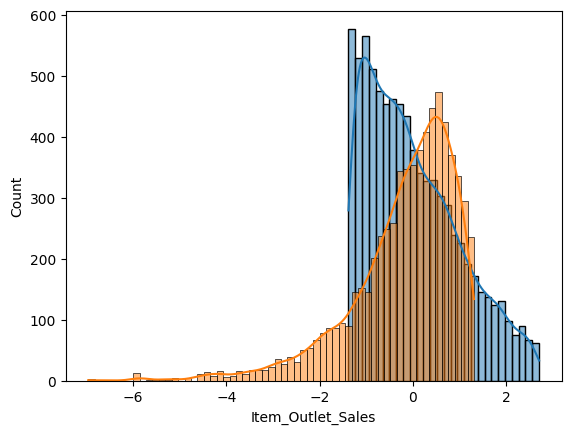

In [88]:
# Investigate the distribution of 'Item_Outlet_Sales'
sns.histplot(data['Item_Outlet_Sales'], kde=True)

# Apply log transformation to address skewness
data['Item_Outlet_Sales_Log'] = np.log1p(data['Item_Outlet_Sales'])

# Check distribution after transformation
sns.histplot(data['Item_Outlet_Sales_Log'], kde=True)
